In [1]:
"""
Created on Fri Nov 10 16:51:47 2017
@author: fernando
"""

import os,glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import SimpleITK as sitk
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow import keras

In [2]:
##Defining the paths for input and output slices
#input for training volumes

trainingInput = 'I:/LNDB_dataset/project/dataset/train/volumes/'
imageTrainingInput = os.path.join(trainingInput, 'img/')
maskTrainingInput = os.path.join(trainingInput, 'mask/')

#Input for validation volumes
validationInput = 'I:/LNDB_dataset/project/dataset/validation/volumes/'
imageValidationInput = os.path.join(validationInput, 'img/')
maskValidationInput = os.path.join(validationInput, 'mask/')

#Output for training slices
trainingOutput = 'I:/LNDB_dataset/project/dataset/train/mip_train/'
imageTrainingOutput = os.path.join(trainingOutput, 'img_parent/img')
maskTrainingOutput = os.path.join(trainingOutput, 'mask_parent/mask')

#Output for validation slices
validationOutput = 'I:/LNDB_dataset/project/dataset/validation/mip_validation/'
imageValidationOutput = os.path.join(validationOutput, 'img_parent/img')
maskValidationOutput = os.path.join(validationOutput, 'mask_parent/mask')

In [3]:
# def make_mips(image_path, output_dir):
#     image = sitk.ReadImage(image_path)
#     image_size = image.GetSize()

#     basename = os.path.basename(image_path)
#     if not os.path.isdir(output_dir):
#         os.makedirs(output_dir)

#     #problem: i want only one projection, no linking btw the 3 or antg
#     for dim in range(3):
#         projection = sitk.MaximumProjection(image, dim)

#         if image_size[dim] % 2:  # odd number
#             voxel = [0, 0, 0]
#             voxel[dim] = (image_size[dim] - 1) / 2
#             origin = image.TransformIndexToPhysicalPoint(voxel)
#         else:  # even
#             voxel1 = np.array([0, 0, 0], int)
#             voxel2 = np.array([0, 0, 0], int)
#             voxel1[dim] = image_size[dim] / 2 - 1
#             voxel2[dim] = image_size[dim] / 2
#             point1 = np.array(image.TransformIndexToPhysicalPoint(voxel1.tolist()))
#             point2 = np.array(image.TransformIndexToPhysicalPoint(voxel2.tolist()))
#             origin = np.mean(np.vstack((point1, point2)), 0)
#         projection.SetOrigin(origin)
#         projection.SetDirection(image.GetDirection())
#         proj_basename = basename.replace('.mhd', '_mip2_{}.mhd'.format(dim))
        
#         print(projection.GetSize())
#         print(type(projection))
# #         writer = sitk.ImageFileWriter()
# #         writer.SetFileName("testcurrent.png")
# #         writer.Execute(projection)
        
#         #array=projection[0,:,:]
        
# #         imgSlice =sitk.GetImageFromArray(array)
# #         plt.imshow(imgSlice, cmap='gray')
# #         plt.show()

#         return projection
#         #sitk.WriteImage(projection, os.path.join(output_dir, proj_basename))

In [3]:
import os

import numpy as np
import SimpleITK as sitk

def make_mips(image_path, output_dir):
    image = sitk.ReadImage(image_path)
    image_size = image.GetSize()
    print(image_size)

    basename = os.path.basename(image_path)
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)

    dim=1
    projection = sitk.MaximumProjection(image, dim)

    if image_size[dim] % 2:  # odd number
        voxel = [0, 0, 0]
        voxel[dim] = (image_size[dim] - 1) / 2
        origin = image.TransformIndexToPhysicalPoint(voxel)
    else:  # even
        voxel1 = np.array([0, 0, 0], int)
        voxel2 = np.array([0, 0, 0], int)
        voxel1[dim] = image_size[dim] / 2 - 1
        voxel2[dim] = image_size[dim] / 2
        point1 = np.array(image.TransformIndexToPhysicalPoint(voxel1.tolist()))
        point2 = np.array(image.TransformIndexToPhysicalPoint(voxel2.tolist()))
        origin = np.mean(np.vstack((point1, point2)), 0)
    projection.SetOrigin(origin)
    projection.SetDirection(image.GetDirection())
    proj_basename = basename.replace('.nii.gz', '_mip_{}.nii.gz'.format(dim))
    return projection
    #sitk.WriteImage(projection, os.path.join(output_dir, proj_basename))

In [4]:
path='D:\Diks Dur\MA1\Projet Grand Challenge\mip_project\LNDb-0001.mhd'
out='D:\Diks Dur\MA1\Projet Grand Challenge\mip_project'

result=make_mips(path,out)
print("size of result ",result.GetSize())
# save_path = os.path.join('D:\Diks Dur\MA1\Projet Grand Challenge\mip_project','testimage.dicom')
# sitk.WriteImage(maresult, save_path)


#So we now the type of data is : simpleitk.simpleitk.Image, dimensions of projection
#is (1,512,328)
#new probleme => data of type int but png/jpg cant do that . need to convert without loosing info

(512, 512, 328)
size of result  (512, 1, 328)


In [30]:
#seeing what numpy gives as dimensions
im=imread('D:\Diks Dur\MA1\Projet Grand Challenge\mip_project\LNDb-0001.mhd')
print(im.shape)        

(328, 512, 512)


In [5]:
import itk 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# from itk.OpenCVImageBridge import ITKImageToCVMat
# import itk.OpenCVImageBridge
import imageio
from skimage.io import imread,imsave,imshow

print("size of result ",result.GetSize())
print("\n")
maresult=result[:,0,:]
print(maresult.GetSize())
print(type(maresult))
print(type(maresult[0,0]))
print("\n")
#################NEED TO ADAPT MARESULT SLICE TO USE DEPENDING ON PROJECTION HERE ITS :,0,: FOR CORONAL
flipped_img = sitk.Flip(maresult, [False, True, True])
sitk.WriteImage(flipped_img, "09output_flipped.dicom")



#image = sitk.ReadImage(inputImageFileName, imageIO="PNGImageIO")
# save_path = os.path.join('D:\Diks Dur\MA1\Projet Grand Challenge\mip_project','testimage.jpg')
# sitk.WriteImage(maresult, save_path)

# print(result.GetPixel(0,0,0))
# print(type(result.GetPixel(0,0,0)))
# print(result.GetPixelIDTypeAsString())
# print("\n")
# casted_result=sitk.Cast(result, sitk.sitkUInt16)
# print(casted_result.GetPixel(0,0,0))
# print(casted_result.GetPixelIDTypeAsString())
# print(type(casted_result))
# print(casted_result.GetSize())
# sliced_casted_result=casted_result[0,:,:]
# save_path = os.path.join('D:\Diks Dur\MA1\Projet Grand Challenge\mip_project','testimage23h.png')
# #sitk.WriteImage(casted_result[0,:,:], save_path)
# #sitk.Show(sliced_casted_result,'title',debugOn=True)

size of result  (512, 1, 328)


(512, 328)
<class 'SimpleITK.SimpleITK.Image'>
<class 'int'>




In [10]:

sitk.Show(result[0,:,:], title="sliceeee")

RuntimeError: Exception thrown in SimpleITK Show: D:\a\1\work\Code\IO\src\sitkImageViewer.cxx:620:
sitk::ERROR: No ImageJ/Fiji application found.

(328, 512)
<class 'numpy.ndarray'>
int16
<class 'SimpleITK.SimpleITK.Image'>


RuntimeError: No suitable template parameter can be found.

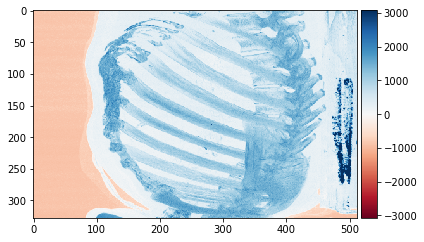

In [13]:
#can use keepaxes because for itk not sitk and image type is sitk
#test on sub vector
other=sitk.GetArrayFromImage(maresult)
print(other.shape)
print(type(other))

print(other.dtype)
imshow(other)
print(type(result))


In [ ]:
array = sitk.GetArrayFromImage(result)
print(array.shape)
print(type(array))
print(array[:,:,0].shape)

print(array.dtype)

new_array=np.zeros_like(array)
np.reshape(array,new_array,'C')

print(new_array.shape)
print(type(new_array))
print(new_array[:,:,0].shape)

print(new_array.dtype)


In [ ]:
# plt.imshow(maresult, cmap='gray')
# plt.show()
print("\n")
newarray=np.transpose(array[0,:,:], axes=None)
print(newarray.shape)

#oublie ca mnt , essayons avc openCV
# basename = os.path.basename(path)
# proj_basename = basename.replace('.mhd', '_mip2_{}.mhd'.format(0))
# sitk.WriteImage(result[0,:,:], "output_filenow.dicom")

imshow(array[:,:,0], cmap=plt.cm.gray)

# imsave('testiiiiing.png', array[:,:,0])

# im2 = (65535*(array[:,:,0] - array[:,:,0].min())/array[:,:,0].ptp()).astype(np.uint16)
# imageio.imwrite('result2-16.png', im2)
# # imageio.imwrite('testing16.png',  im2.astype(np.uint16))
# im=imread("result2-16.png")
# print(im.shape)

#PISTE : QUAND JE CONVERTIS les dimensiosn sinversnt !!